# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# IMPORT DATASET

In [2]:
file_path = 'C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# DOWNSAMPLING

In [3]:
target_variable = 'Diabetes_012'
class_0 = df[df[target_variable] == 0]
class_1 = df[df[target_variable] == 1]
class_2 = df[df[target_variable] == 2]
downsampled_size = 4631
class_0_downsampled = class_0.sample(n=downsampled_size, random_state=42)
class_1_downsampled = class_1.sample(n=downsampled_size, random_state=42)
class_2_downsampled = class_2.sample(n=downsampled_size, random_state=42)
f_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
print(f_downsampled)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
162288           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
227646           0.0     1.0       0.0        1.0  32.0     1.0     0.0   
888              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
230094           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
134829           0.0     0.0       0.0        1.0  35.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
66672            2.0     1.0       1.0        1.0  35.0     1.0     0.0   
42017            2.0     1.0       1.0        1.0  32.0     1.0     1.0   
67332            2.0     0.0       0.0        1.0  26.0     1.0     0.0   
251948           2.0     0.0       1.0        1.0  26.0     0.0     0.0   
171966           2.0     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
162288                   

# DOWNSAMPLED COUNT

In [4]:
print("Class Distribution in Downsampled Data:")
print(f_downsampled[target_variable].value_counts())
print("Unique Classes in Downsampled Data:", f_downsampled[target_variable].unique())
print("Class Distribution in Downsampled Data:", f_downsampled[target_variable].value_counts())

Class Distribution in Downsampled Data:
Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64
Unique Classes in Downsampled Data: [0. 1. 2.]
Class Distribution in Downsampled Data: Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# DATA SPLIT

In [5]:
X = f_downsampled.drop(target_variable, axis=1)  
y = f_downsampled[target_variable] 
test_size = 0.2  
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size , stratify=y)


# Logistic Regression

In [6]:
Logistic_Regression = LogisticRegression(random_state=42)
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_test)
print("Predicted labels for the test set:", y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Predicted labels for the test set: [2. 0. 2. ... 0. 2. 2.]
Accuracy: 51.49334292911119 %
Confusion Matrix:
 [[588 182 157]
 [259 321 346]
 [171 233 522]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.63      0.60       927
         1.0       0.44      0.35      0.39       926
         2.0       0.51      0.56      0.54       926

    accuracy                           0.51      2779
   macro avg       0.51      0.51      0.51      2779
weighted avg       0.51      0.51      0.51      2779



C:\Users\Nithya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DATA VISUALIZATION

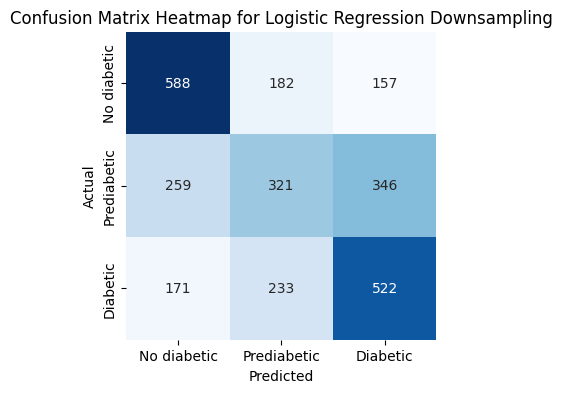

In [8]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["No diabetic", "Prediabetic", "Diabetic"],
            yticklabels=["No diabetic", "Prediabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for Logistic Regression Downsampling')
plt.show()

# FEATURE RANKING

In [ ]:
abs_coefs = np.abs(Logistic_Regression.coef_[0])
sorted_idx = np.argsort(abs_coefs)

# Plot the feature importance
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), abs_coefs[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns.tolist()[i] for i in sorted_idx])
plt.xlabel('Absolute Coefficient Values')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Ranking')
plt.show()